<center>
    
# CAPSTONE PROJECT

## eCommerce & Retail Analytics

</center>

### Client
* True North Groceries (TNG) is an online grocery retailer that sells a wide variety of fresh, frozen, and non-perishable groceries and food products through their mobile app and website. They believe leveraging data and analytics will be foundational to their long-term success and that it can no longer be something that’s delivered by non-analytics professionals at the side of their desks. TMG is interested in hiring your firm to help them build-out the company’s analytics practice; however, they would like to try before they buy and have asked for your company to deliver a proof-of-concept to showcase your firm’s ability to deliver incremental value through data and analytics.<br>

### Your Task
* Your tasks is to understand your client’s business and operating model, identify where analytics could be applied to make better decisions, and finally deliver a proof-of-concept solution for to a few of business opportunities and challenges they face. <br>
* **Path-to-purchase Personalized Product Recommendations:** The idea here is to recommend products to customers as they browse our mobile app and desktop platforms. These recommendations should be ideally a function of what product(s) a customer is currently browsing during their shopping session. For example, if a client just added Heinz Ketchup to their basket, the app might recommend that they purchase Mustard as well.
<br>
* **“Buy it again” Product Recommendations:** Another important product feature that TNG is looking to add is a “Buy It Again” email. Some analysis conducted by TMG showed that customers with a high number of repeat purchases tend to be significantly more profitable and less likely to attrite than the average customer. As such TMG has devised a strategy to grow this segment through the use of personalized outbound email marketing. For example, if it looks like a customer tends to purchases Laundry Detergent every 3-4 weeks, can we send them a proactive email? Thinking along these, one could also understand which items are frequently re-purchased and the time between purchases to inform decisions as early as possible (without having to wait several weeks to detect that a client tends to purchase Laundry Detergent every 3-4 weeks).
<br>

## <center> <font color=red>1. DATA UNDERSTANDING</font> </center>

### Datasets

|Dataset                | Description
|:---                   | :---
|departments            | List of departments at True North Groceries
|aisles                 | List of aisles
|products               | List of products. We have approximately 50,000 products
|orders                 | Details for all the Orders placed by Customers. We have 3,421,083 orders.
|order_products_prior   | This table details all the products in each of the order and has an indicator for if it’s a reorder.

### ER Diagram

<img src="erd.jpg">

## <center> <font color=red>2. DATA EXPLORATION</font> </center>

#### The data prep stage is to:
> a. Get Rid of bad columns from the dataframes. These were imported from the file.

> b. Check for duplicate rows, ids or any variables that should be unique. For example, name of department

> c. Check for bad data or characters in any of the name fields. Such as product_name

> d. Identify missing values 

> e. Check referential integrity between the entities

> f. Create a denormalized dataframe by merging departments, aisles, products

> g. Create a denormalized dataframe by merging deparments, aisles, products, orders, order_product_prior


In [ ]:
library(arules)
library(arulesViz)
library(tidyverse)
library(readxl)
library(plyr)
library(ggplot2)
library(knitr)
library(lubridate)
library(RColorBrewer)
library(Amelia) # For missing values
library(sqldf)
library(data.table)
library(dplyr)

In [2]:
setwd("C:\\Users\\somsa\\Documents\\Trainings\\York_University\\1_BigDataAnalytics\\CSDA1050 Advanced Analytics Capstone Course\\Capstone Project\\OriginalDataset\\")


######################################################################################
#####################   IMPORT AND BROWSE DATASETS for PROJECT  ######################
##### This round of data exploration is just to check structure, etc         #########
######################################################################################

departments <- read.csv("departments.csv", header=TRUE, na=c(""))
aisles <- read.csv("aisles.csv", header=TRUE, na=c(""))
products <- read.csv("products_subset.csv", header=TRUE, na=c(""), encoding="UTF-8")
orders <- read.csv("orders.csv", header=TRUE, na=c(""))
order_products_prior <- read.csv("Capstone 1_Data Set-order_products__prior.csv", header=TRUE, na=c(""))

In [7]:
#### 1. Departments

# We have 21 departments
print ("Departments:")
#print(str(departments))

#print(dim(departments))

#print(head(departments, 3))

#print(names(departments))

kable(head(departments))



#### 2. Aisles

# We have 134 isles

print ("Aisles:")
#print(str(aisles))

#print(dim(aisles))

#print(head(aisles, 3))

#print(names(aisles))

kable(head(aisles))

#### 3. Products

# We have 48,170 Products
# We have a few extra columns. row_num - We don't need. And a few more columns at the end which are not required.
# We will get rid of those columns in the data prep phase

print ("Products:")
#print(str(products))

#print(dim(products))

#print(head(products, 3))

#print(names(products))

# kable(head(products, 3))

# glimpse(products)

kable(head(products))

#### 4. Orders

# We have 3,421,083 Orders
# We have a few extra columns. row_num - We don't need. And a few more columns at the end which are not required.
# We will get rid of those columns in the data prep phase

print ("Orders:")
#print(str(orders))

#print(dim(orders))

#print(head(orders, 3))

#print(names(orders))

kable(head(orders))

#### 5. Orders Products Prior

# We have 16,500,000 Products Ordered
# We have a few extra columns. row_num - We don't need. And a few more columns at the end which are not required.
# We will get rid of those columns in the data prep phase
print ("Order_Products:")
#print(str(order_products_prior))

#print(dim(order_products_prior))

#print(head(order_products_prior, 3))

#print(names(order_products_prior))

kable(head(order_products_prior))


[1] "Departments:"




| department_id|department    |
|-------------:|:-------------|
|             1|frozen        |
|             2|other         |
|             3|bakery        |
|             4|produce       |
|             5|alcohol       |
|             6|international |

[1] "Aisles:"




| aisle_id|aisle                      |
|--------:|:--------------------------|
|        1|PREPARED SOUPS SALADS      |
|        2|specialty cheeses          |
|        3|energy granola bars        |
|        4|INSTANT FOODS              |
|        5|marinades meat preparation |
|        6|OTHER                      |

[1] "Products:"




| row_num| product_id|product_name                                                      | aisle_id| department_id|X  |X.1 |X.2 |X.3 |X.4 |X.5 |
|-------:|----------:|:-----------------------------------------------------------------|--------:|-------------:|:--|:---|:---|:---|:---|:---|
|       0|          1|Chocolate Sandwich Cookies                                        |       61|            19|NA |NA  |NA  |NA  |NA  |NA  |
|       1|          2|All-Seasons Salt                                                  |      104|            13|NA |NA  |NA  |NA  |NA  |NA  |
|       2|          3|Robust Golden Unsweetened Oolong Tea                              |       94|             7|NA |NA  |NA  |NA  |NA  |NA  |
|       3|          4|Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce |       38|             1|NA |NA  |NA  |NA  |NA  |NA  |
|       4|          5|Green Chile Anytime Sauce                                         |        5|            13|NA |NA  |NA  |NA  |N

[1] "Orders:"




| order_id| user_id|eval_set | order_number| order_dow| order_hour_of_day| days_since_prior_order|
|--------:|-------:|:--------|------------:|---------:|-----------------:|----------------------:|
|  2539329|       1|prior    |            1|         2|                 8|                     NA|
|  2398795|       1|prior    |            2|         3|                 7|                     15|
|   473747|       1|prior    |            3|         3|                12|                     21|
|  2254736|       1|prior    |            4|         4|                 7|                     29|
|   431534|       1|prior    |            5|         4|                15|                     28|
|  3367565|       1|prior    |            6|         2|                 7|                     19|

[1] "Order_Products:"




|  X| order_id| product_id| add_to_cart_order| reordered|
|--:|--------:|----------:|-----------------:|---------:|
|  0|        2|      33120|                 1|         1|
|  1|        2|      28985|                 2|         1|
|  2|        2|       9327|                 3|         0|
|  3|        2|      45918|                 4|         1|
|  4|        2|      30035|                 5|         0|
|  5|        2|      17794|                 6|         1|

### 1.a Remove Bad Columns

In [3]:
############## a. Get rid of bad columns imported 
products<-products[,c(2,3,4,5)]
#View(products)
order_products_prior<-order_products_prior[,c(2:5)]
#View(order_products_prior)

### 1.b Check for duplicate rows, ids or any variables

In [13]:
############## b. Check for duplicate rows, ids or any variables

#departments
print("Check for duplicate rows, ids or any variables - DEPARTMENTS")
departments[duplicated(departments),] #No Duplicate rows
departments[duplicated(departments$id),] # No Duplicate id
departments[duplicated(departments$name),] # No Duplicate department name

#aisles
print("Check for duplicate rows, ids or any variables - AISLES")
aisles[duplicated(aisles),] #No Duplicate rows
aisles[duplicated(aisles$id),] # No Duplicate id
aisles[duplicated(aisles$name),] # No Duplicate department name

#products
print("Check for duplicate rows, ids or any variables - PRODUCTS")
products[duplicated(products),] #No Duplicate rows
products[duplicated(products$product_id),] # No Duplicate id
products[duplicated(products$product_name),] # No Duplicate department name

#orders
print("Check for duplicate rows, ids or any variables - ORDERS")
orders[duplicated(orders),] #No Duplicate rows
orders[duplicated(orders$order_id),] # No Duplicate id

#order_products_prior
print("Check for duplicate rows - ORDER_PRODUCTS_PRIOR")
order_products_prior[duplicated(order_products_prior),] #No Duplicate rows

print("******** NO DUPLICATES FOUND IN ANY OF THE DATASETS ********")

[1] "Check for duplicate rows, ids or any variables - DEPARTMENTS"


department_id,department


department_id,department


department_id,department


[1] "Check for duplicate rows, ids or any variables - AISLES"


aisle_id,aisle


aisle_id,aisle


aisle_id,aisle


[1] "Check for duplicate rows, ids or any variables - PRODUCTS"


product_id,product_name,aisle_id,department_id


product_id,product_name,aisle_id,department_id


product_id,product_name,aisle_id,department_id


[1] "Check for duplicate rows, ids or any variables - ORDERS"


order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


[1] "Check for duplicate rows - ORDER_PRODUCTS_PRIOR"


,order_id,product_id,add_to_cart_order,reordered
9000001,1424849,39099,13,1
9000002,1424849,42612,14,1
9000003,1424849,28226,15,1
9000004,1424849,25513,16,1
9000005,1424849,47630,17,1
9000006,1424849,13338,18,1
9000007,1424849,34969,19,0
9000008,1424849,28204,20,1
9000009,1424850,12316,1,1
9000010,1424850,44581,2,1


### 1.c Check for Bad Data, and remove bad characters from product_name

In [4]:
############## c. Check for Bad Data, and remove bad characters from product_name

# This function will return FALSE if any characters other than the list is found
bad_chars <- function(x) grepl("[^A-Za-z'& 0-9.,%+-//(//)!#$:.;//*\"]", x) 

# Detect non-ASCII
# This function will convert string to ASCII and the try to detect all the generated non printable
# control characters which couldn't be converted
check_non_ascii <- function(x) { grepl("[[:cntrl:]]", stringi::stri_enc_toascii(x)) }

# Remove bad characters
remove_bad_chars <- function (x, y) { gsub(y, "", x) }

# Remove bad characters
remove_bad_chars1 <- function (x, y) { gsub(y, "", x, fixed=TRUE) }

# Replace bad strings with the correct ones
replace_bad_strings <- function (x, y, z) { gsub(y, z, x) }


print("Check for bad characters in department$department:")
departments[bad_chars(departments$department),]

print("Check for bad characters in aisles$aisle:")
aisles[bad_chars(aisles$aisle),]

print("Check for bad characters in products$product_name:")
length(products[bad_chars(products$product_name),]) # Check for any product_name with bad characters


# Data cleansing required for product_name
#   * product_name with "~(*@"
#   * product_name with \\"x13\\"
#   * product_name = #NAME?
#   * product_name with \

products$product_name <- remove_bad_chars(products$product_name, "~\\(\\*@")
products$product_name <- remove_bad_chars(products$product_name, "\\\\\"x13\\\\\"")
products$product_name <- remove_bad_chars1(products$product_name, "\\") 
products$product_name <- replace_bad_strings(products$product_name, "<U+FFFD>", "")
products$product_name <- remove_bad_chars(products$product_name, ",") #Key essential step before generating the basket format dataset is to remove "commas" from the product_name
products$product_name <- remove_bad_chars(products$product_name, "\"")

#products[check_non_ascii(products$product_name),]

print("Check for bad characters in products$product_name:")
print("After Cleansing the data, we do see that all valid product names")
#View(products[bad_chars(products$product_name),]) # Check for any product_name with bad characters

[1] "Check for bad characters in department$department:"


department_id,department


[1] "Check for bad characters in aisles$aisle:"


aisle_id,aisle


[1] "Check for bad characters in products$product_name:"


[1] 4

[1] "Check for bad characters in products$product_name:"
[1] "After Cleansing the data, we do see that all valid product names"


In [16]:
# For Orders - Verify Values
# a. Check if any eval_set values other than test, train prior
table(orders$eval_set)
# b. Check if any order_dow values other than 0-6
table(orders$order_dow)
# c. Check if any order_dow values other than 0-23
table(orders$order_hour_of_day)
# d. For all order_number=1, check if days_since_prior_order=NA
head(orders[orders$order_number == 1 & !is.na(orders$days_since_prior_order),])
head(orders[orders$order_number != 1 & is.na(orders$days_since_prior_order),])

print("******** CATEGORICAL VARIABLES IN ORDERS HAVE CORRECT VALUES ********")


  prior    test   train 
3214874   75000  131209 


     0      1      2      3      4      5      6 
600905 587478 467260 436972 426339 453368 448761 


     0      1      2      3      4      5      6      7      8      9     10 
 22758  12398   7539   5474   5527   9569  30529  91868 178201 257812 288418 
    11     12     13     14     15     16     17     18     19     20     21 
284728 272841 277999 283042 283639 272553 228795 182912 140569 104292  78109 
    22     23 
 61468  40043 

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


[1] "******** CATEGORICAL VARIABLES IN ORDERS HAVE CORRECT VALUES ********"


### 1.d Find Missing Values

In [20]:
## Identify Missing Values (Method 1) - aisles
miss = function(x){sum(is.na(x))}
pMiss = function(x){sum(is.na(x))/length(x)*100}

print("Missing Values in asiles:")
apply(aisles,2,miss)
print("Missing Values in departments:")
apply(departments,2,miss)
print("Missing Values in products:")
apply(products,2,miss)
print("Missing Values in orders:")
apply(orders,2,miss)
print("Missing Values in order_products_prior:")
apply(order_products_prior,2,miss)

############## 1.2 Missing Values Treatment

## For orders 
print("Orders have 206209 missing values for days_since_prior_order, but that is ok. NA means it was the first order")
cat("\n")
## For order_product_prior - 
print("In order_product_prior, OrderID and ProductID missing in the parent table. These records will be automatically removed during the data preparation phase when we inner join all datasets.")
cat("\n")
## For products
print("For products missing 186 aisle_id and 157 department_id, we will impute as part of DATA PREP Phase 2")
cat("\n")

[1] "Missing Values in asiles:"


aisle_id    aisle 
       0        0

[1] "Missing Values in departments:"


department_id    department 
            0             0

[1] "Missing Values in products:"


product_id  product_name      aisle_id department_id 
            0             0           186           157

[1] "Missing Values in orders:"


order_id                user_id               eval_set 
                     0                      0                      0 
          order_number              order_dow      order_hour_of_day 
                     0                      0                      0 
days_since_prior_order 
                206209

[1] "Missing Values in order_products_prior:"


order_id        product_id add_to_cart_order         reordered 
                0                 0                 0                 0

[1] "Orders have 206209 missing values for days_since_prior_order, but that is ok. NA means it was the first order"

[1] "In order_product_prior, OrderID and ProductID missing in the parent table. These records will be automatically removed during the data preparation phase when we inner join all datasets."

[1] "For products missing 186 aisle_id and 157 department_id, we will impute as part of DATA PREP Phase 2"



### 1.e Check Referential Integrity and remove Orphan records

In [21]:
## Any products.department_id that does not exist in the departments - Yes, 157, but those are due to NA values
print("Any products.department_id that does not exist in the departments:")
#nrow(products[!products$department_id %in% departments$department_id,])
nrow(products[!(products$department_id %in% departments$department_id) & !is.na(products$department_id),])

## Any products.aisle_id that does not exist in the asiles - Yes, 186, but those are doe to NA values
print("Any products.aisle_id that does not exist in the asiles:")
nrow(products[!(products$aisle_id %in% aisles$aisle_id) & !is.na(products$aisle_id),])

## Any order_products_prior.product_id that does not exist in the products - Yes, 348916
print("Any order_products_prior.product_id that does not exist in the products:")
nrow(order_products_prior[!order_products_prior$product_id %in% products$product_id,])

# Any order_products_prior.order_id that does not exist in the orders - No, 0
print("Any order_products_prior.order_id that does not exist in the orders:")
nrow(order_products_prior[!order_products_prior$order_id %in% orders$order_id,])


[1] "Any products.department_id that does not exist in the departments:"


[1] 0

[1] "Any products.aisle_id that does not exist in the asiles:"


[1] 0

[1] "Any order_products_prior.product_id that does not exist in the products:"


[1] 348916

[1] "Any order_products_prior.order_id that does not exist in the orders:"


[1] 0

#### TEMPORARY
* Remove any rows from products where aisle_id or department_id is missing AISLE or DEPARTMET dataframe


In [6]:
############## TEMPORARY - Only keep the products with department_id and aisle_id
print("nrow is products before:")
nrow(products)
products_clean <- products[products$department_id %in% departments$department_id & products$aisle_id %in% aisles$aisle_id,]
cat("\n")
print("nrow is products after:")
nrow(products_clean)

[1] "nrow is products before:"


[1] 48170


[1] "nrow is products after:"


[1] 47827

### 1.f Create a denormalized dataframe by merging departments, aisles, products

In [7]:
############# 1.f Create one dataframe with products, departments, aisles

product_aisle_department <- Reduce(function(x, y) merge(x, y, all=FALSE), list(products_clean, departments, aisles))
kable(head(product_aisle_department))



| aisle_id| department_id| product_id|product_name                |department |aisle                 |
|--------:|-------------:|----------:|:---------------------------|:----------|:---------------------|
|        1|            20|      10288|Broccoli with Almond Soup   |deli       |PREPARED SOUPS SALADS |
|        1|            20|      41116|Spinach Dijon Salad         |deli       |PREPARED SOUPS SALADS |
|        1|            20|      47885|Black Bean Salad            |deli       |PREPARED SOUPS SALADS |
|        1|            20|      48474|Deli Fresh Coleslaw         |deli       |PREPARED SOUPS SALADS |
|        1|            20|       6778|Soup Golden Quinoa and Kale |deli       |PREPARED SOUPS SALADS |
|        1|            20|      22155|Petite Caesar Salad         |deli       |PREPARED SOUPS SALADS |

### 1.g Merge all dataframes using inner join - product_aisle_department and order_products_prior and dow

In [9]:
############  1.g - PERMANENT - What if we tried joining all large, hw long does it take? - 5 minutes, 1.09 GB
x <- Sys.time()
dow <- data.frame("order_dow"=0:6, "order_day"=c('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'))
factor(dow)
order_products_large <- Reduce(function(x, y) merge(x, y, all=FALSE), list(product_aisle_department, order_products_prior, orders, dow))
y <- Sys.time() # Took 5 minutes to run
#object.size(order_products_large) #1.09 GB
kable(head(order_products_large))
cat("\n")
print("Number of records in: order_products_large" )
print(nrow(order_products_large))
cat("\n")
print("Time taken to create the large denormalized dataset - order_products_large: ")
print(y-x)

order_dow              order_day 
                   0:6 c(4, 2, 6, 7, 5, 1, 3) 
Levels: 0:6 c(4, 2, 6, 7, 5, 1, 3)



| order_dow| order_id| product_id| aisle_id| department_id|product_name                               |department |aisle                      | add_to_cart_order| reordered| user_id|eval_set | order_number| order_hour_of_day| days_since_prior_order|order_day |
|---------:|--------:|----------:|--------:|-------------:|:------------------------------------------|:----------|:--------------------------|-----------------:|---------:|-------:|:--------|------------:|-----------------:|----------------------:|:---------|
|         0|  1900953|      20153|      100|            21|Eat Your Colors Purples Puree Baby Food    |missing    |missing                    |                18|         0|  151991|prior    |           23|                17|                     12|Sun       |
|         0|  3194251|       4846|       38|             1|Weight Watchers Three Cheese Ziti Marinara |frozen     |frozen meals               |                 7|         1|   52051|prior    |            9|         


[1] "Number of records in: order_products_large"
[1] 16054761

[1] "Time taken to create the large denormalized dataset - order_products_large: "
Time difference of 2.854563 mins


## <center> <font color=red>2. DATA VISUALIZATION</font> </center>
******

### DEPARTMENTS

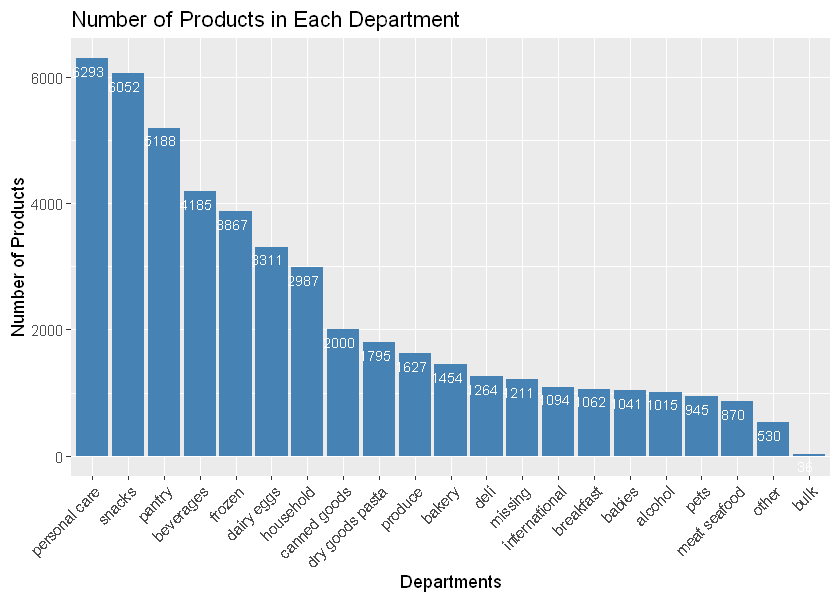

In [28]:
# 1.1 Number of products in each department
options(repr.plot.width = 7, repr.plot.height = 5)

product_aisle_department %>%
  group_by( department) %>%
  dplyr::summarize(num_products = n()) %>%
  arrange(desc(num_products)) %>%
  ggplot( aes(x = reorder(department, -num_products), y = num_products)) +
  geom_bar(stat = "identity", fill="steelblue") +
  geom_text(aes(label=paste(num_products," ")), vjust=1.6, color="white", size=3) +
  labs( title = "Number of Products in Each Department",
        subtitle = "Lets go bananas",
        x = "Departments", 
        y = "Number of Products") +
  labs(subtitle = NULL) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

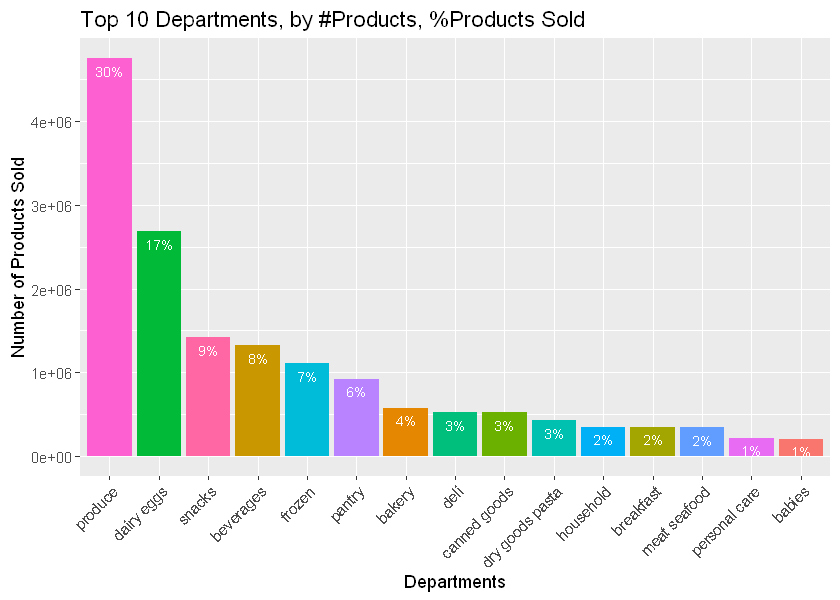

In [29]:
# Lets look at department wise product percentage sales
order_products_large %>%
  group_by( department) %>%
  dplyr::summarize(perc = (n()/nrow(order_products_large)) * 100, cnt =n()) %>%
  mutate(perc_txt = paste(round(perc,0), "%", sep = "")) %>%
  top_n(15,wt=cnt)    %>%
  arrange(desc(perc)) %>%
  ggplot( aes(x = reorder(department, -cnt), y = cnt, fill = department)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=perc_txt), vjust=1.6, color="white", size=3) +
  labs( title = "Top 10 Departments, by #Products, %Products Sold",
        subtitle = "Lets go bananas",
        x = "Departments", 
        y = "Number of Products Sold") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position="none")

### AISLES

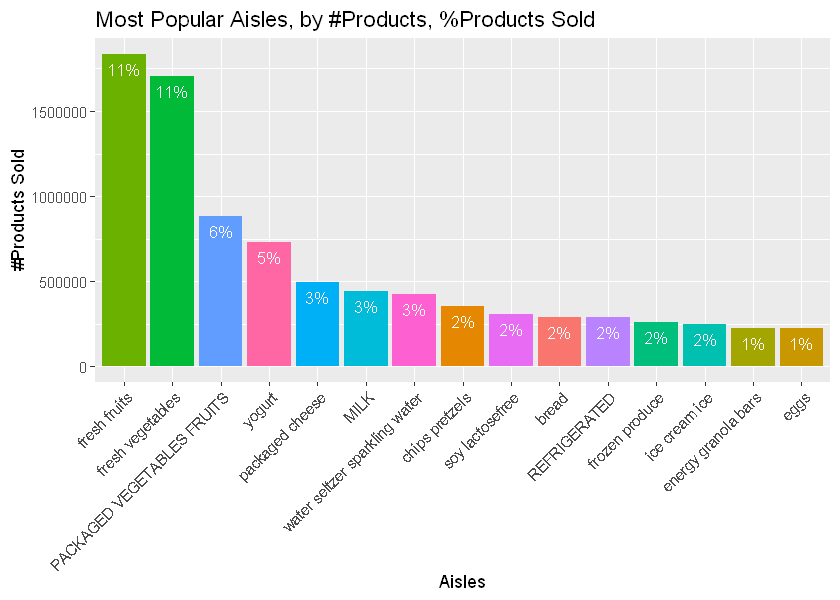

In [30]:
# 2.1 Most Popular Aisles

order_products_large %>%
  group_by( aisle) %>%
  dplyr::summarize(perc = (n()/nrow(order_products_large)) * 100, cnt = n()) %>%
  mutate(perc_txt = paste(round(perc,0), "%", sep = "")) %>%
  top_n(15,wt=cnt)    %>%
  arrange(desc(perc)) %>%
  ggplot(aes(x = reorder(aisle, -perc), y = cnt, fill = aisle)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=perc_txt), vjust=1.6, color="white", size=3.5) +
  labs( title = "Most Popular Aisles, by #Products, %Products Sold",
        subtitle = "Lets go bananas",
        x = "Aisles", 
        y = "#Products Sold",
        fill = "Aisles") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position="none")

### ORDERS

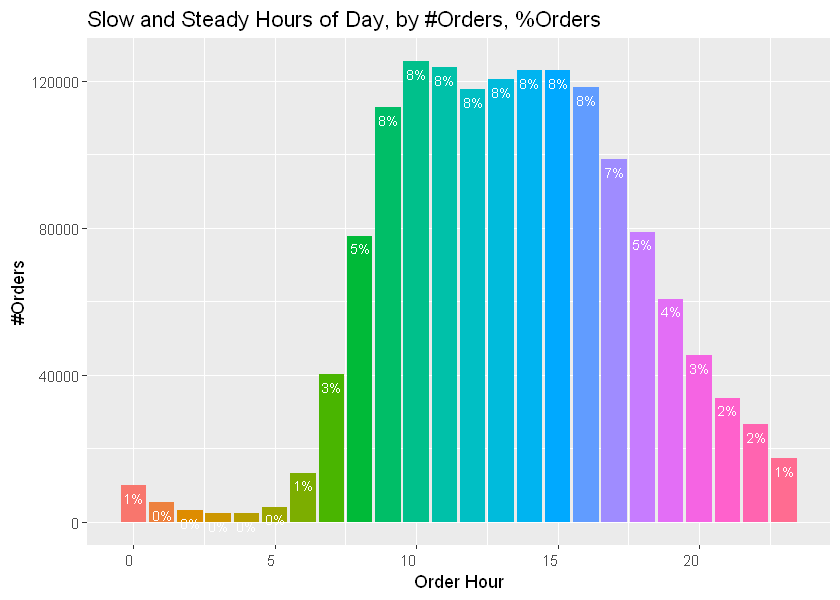

In [31]:
# Hour of Day Buying, in terms of % of orders
order_products_large %>%
  group_by( order_hour_of_day) %>%
  dplyr::summarize(perc = (n_distinct(order_id)/length(unique(order_products_large$order_id))) * 100, cnt = n_distinct(order_id)) %>%
  mutate(perc_txt = paste(round(perc,0), "%", sep = "")) %>%
  arrange(desc(order_hour_of_day)) %>%
  ggplot(aes(x = order_hour_of_day, y = cnt, fill = factor(order_hour_of_day))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=perc_txt), vjust=1.6, color="white", size=3)+
  labs( title = "Slow and Steady Hours of Day, by #Orders, %Orders",
        subtitle = "Lets go bananas",
        x = "Order Hour", 
        y = "#Orders") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 0, hjust = 1), legend.position="none")

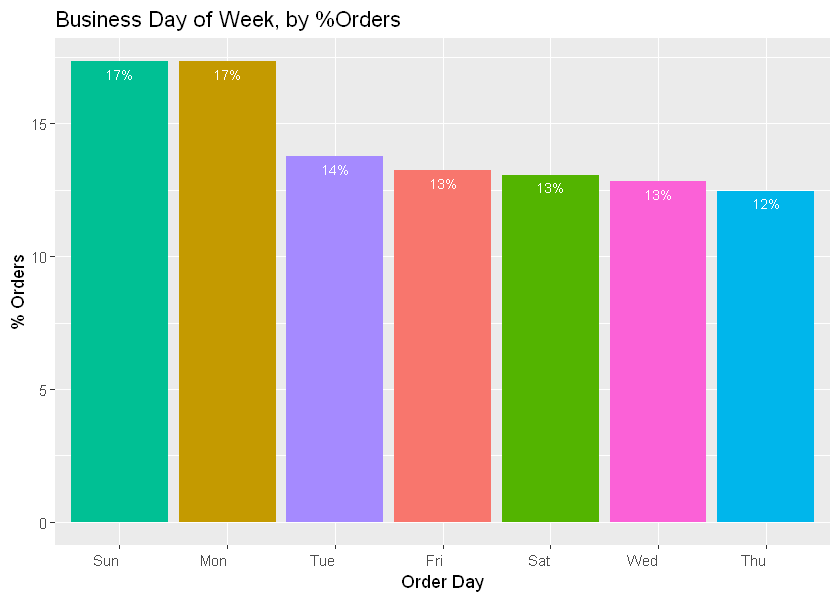

In [32]:
# Busiest Day of Week in terms of % of orders
order_products_large %>%
  group_by( order_day) %>%
  dplyr::summarize(perc = (n_distinct(order_id)/length(unique(order_products_large$order_id))) * 100) %>%
  mutate(perc_txt = paste(round(perc,0), "%", sep = "")) %>%
  arrange(desc(perc)) %>%
  ggplot( aes(x = reorder(order_day, -perc), y = perc, fill = order_day)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=perc_txt), vjust=1.6, color="white", size=3)+
  labs( title = "Business Day of Week, by %Orders",
        subtitle = "Lets go bananas",
        x = "Order Day", 
        y = "% Orders",
        fill = "Order Day") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 0, hjust = 1), legend.position="none")

### PRODUCTS

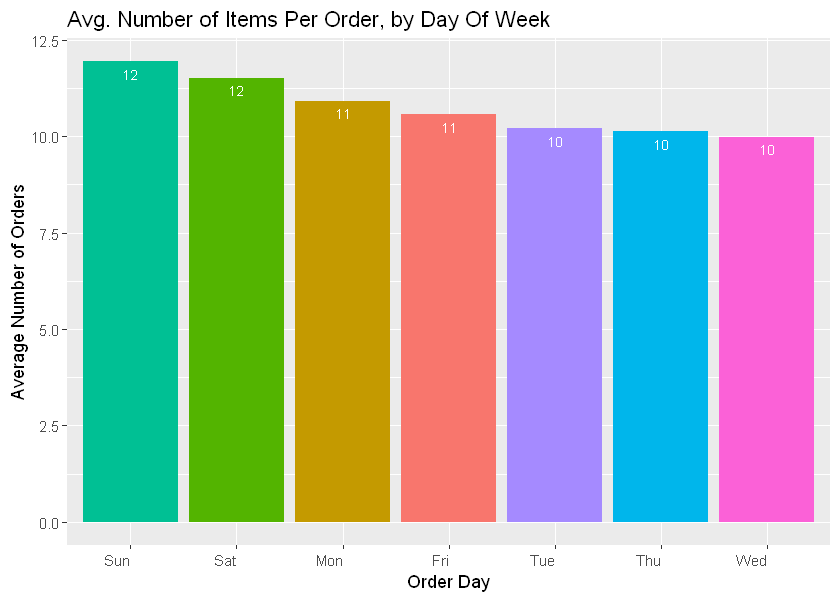

In [34]:
# Average Number of Products per Order, Based on Day of Week
df <- order_products_large %>%
  group_by( order_id, order_day  ) %>%
  dplyr::summarize(sum_products = n()) %>%
  group_by( order_day  ) %>%
  dplyr::summarize(average_items_per_order = mean(sum_products) ) %>%
  arrange(desc(average_items_per_order))


ggplot(data = df, aes(x = reorder(order_day, -average_items_per_order), y = average_items_per_order, fill = order_day)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=round(average_items_per_order)), vjust=1.6, color="white", size=3) +
  labs( title = "Avg. Number of Items Per Order, by Day Of Week",
        subtitle = "Lets go bananas",
        x = "Order Day", 
        y = "Average Number of Orders",
        fill = "Order Day") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 0, hjust = 1), legend.position="none")

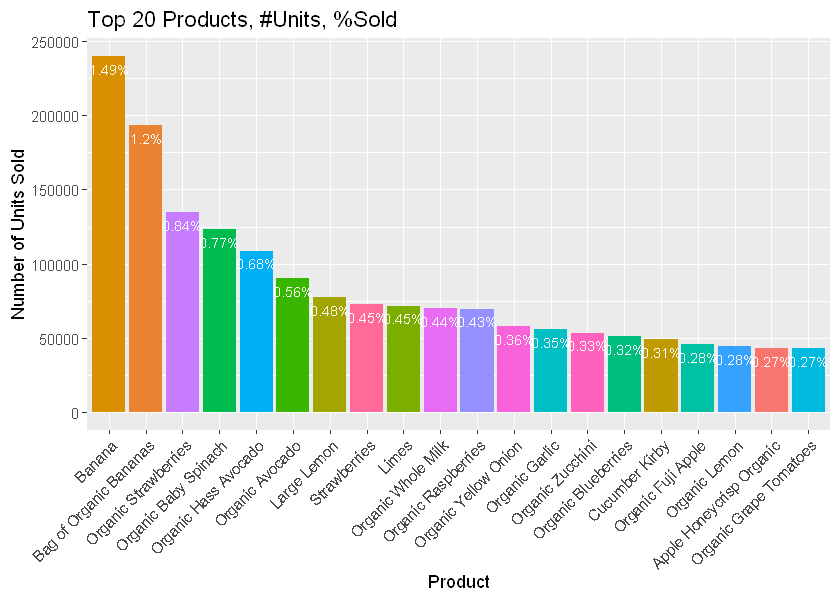

In [35]:
# Top 20 products sold
order_products_large %>%
  group_by( product_name) %>%
  dplyr::summarize(perc = (n()/nrow(order_products_large)) * 100, cnt =n()) %>%
  mutate(perc_txt = paste(round(perc,2), "%", sep = "")) %>%
  top_n(20, wt=cnt) %>%
  arrange(desc(perc)) %>%
  ggplot( aes(x = reorder(product_name, -perc), y = cnt, fill = product_name)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=perc_txt), vjust=1.6, color="white", size=3) +
  labs( title = "Top 20 Products, #Units, %Sold",
        subtitle = "Lets go bananas",
        x = "Product", 
        y = "Number of Units Sold",
        fill = "Product") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position="none")

### REORDERS

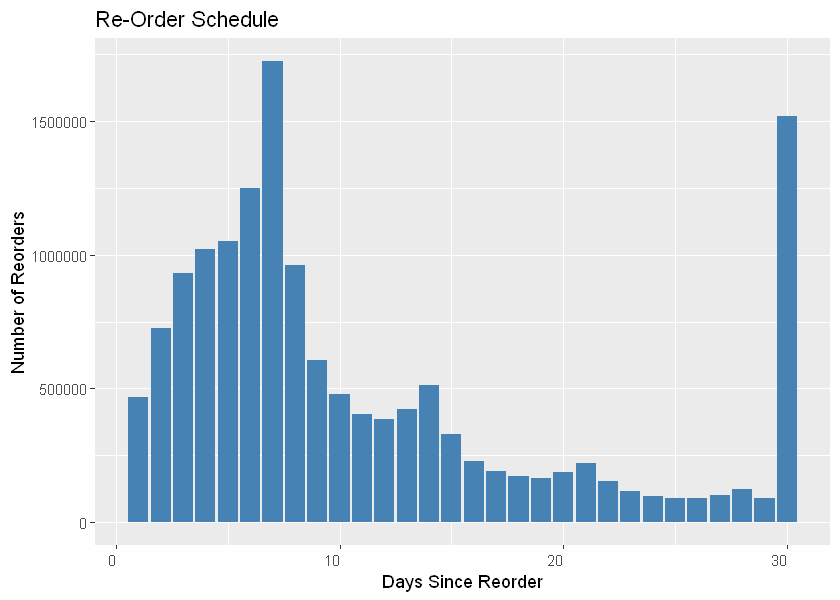

In [36]:
# What is a re-order schedule like?
order_products_large %>%
  filter(days_since_prior_order>0) %>%
  group_by( days_since_prior_order) %>%
  dplyr::summarize(cnt = n()) %>%
  ggplot( aes(x = days_since_prior_order, y = cnt )) +
  geom_bar(stat = "identity", fill="steelblue") +
  #geom_text(aes(label=cnt), vjust=1.6, color="white", size=4) +
  labs( title = "Re-Order Schedule",
        subtitle = "Lets go bananas",
        x = "Days Since Reorder", 
        y = "Number of Reorders",
        fill = "days_since_prior_order") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 0, hjust = 1), legend.position="none")

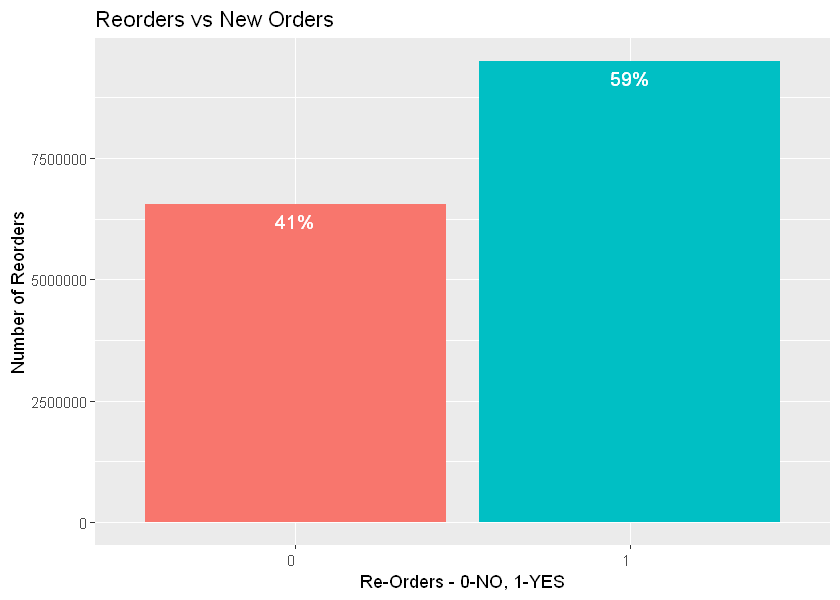

In [37]:
# How often do customers place re-orders?

order_products_large %>%
  group_by(reordered) %>%
  dplyr::summarize(cnt = n()) %>%
  mutate(perc = (cnt/sum(cnt))*100, reordered = as.factor(reordered)) %>%
  mutate(perc_txt = paste(round(perc,0), "%", sep = "")) %>%
  ggplot( aes(x = reordered, y = cnt, fill = factor(cnt) )) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=perc_txt), vjust=1.6, color="white", size=4) +
  labs( title = "Reorders vs New Orders",
        subtitle = "Lets go bananas",
        x = "Re-Orders - 0-NO, 1-YES", 
        y = "Number of Reorders",
        fill = "days_since_prior_order") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 0, hjust = 1), legend.position="none")

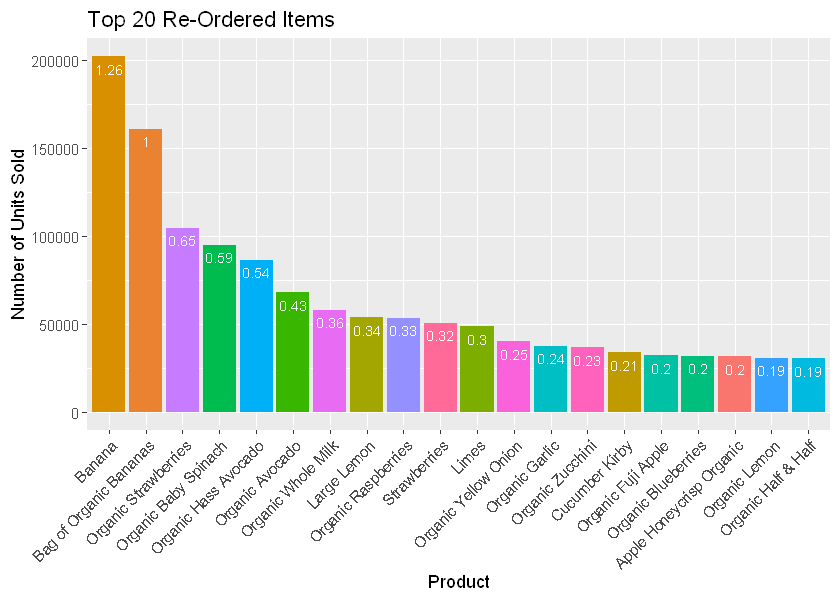

In [38]:
# Top 20 most re-ordered items
order_products_large %>%
  filter(reordered==1) %>%
  group_by( product_name) %>%
  dplyr::summarize(perc = (n()/nrow(order_products_large)) * 100, cnt =n()) %>%
  top_n(20,wt=cnt)    %>%
  arrange(desc(perc)) %>%
  ggplot(aes(x = reorder(product_name, -perc), y = cnt, fill = product_name)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=round(perc,2)), vjust=1.6, color="white", size=3) +
  labs( title = "Top 20 Re-Ordered Items",
        subtitle = "Lets go bananas",
        x = "Product", 
        y = "Number of Units Sold",
        fill = "Product") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position="none")

### CUSTOMERS

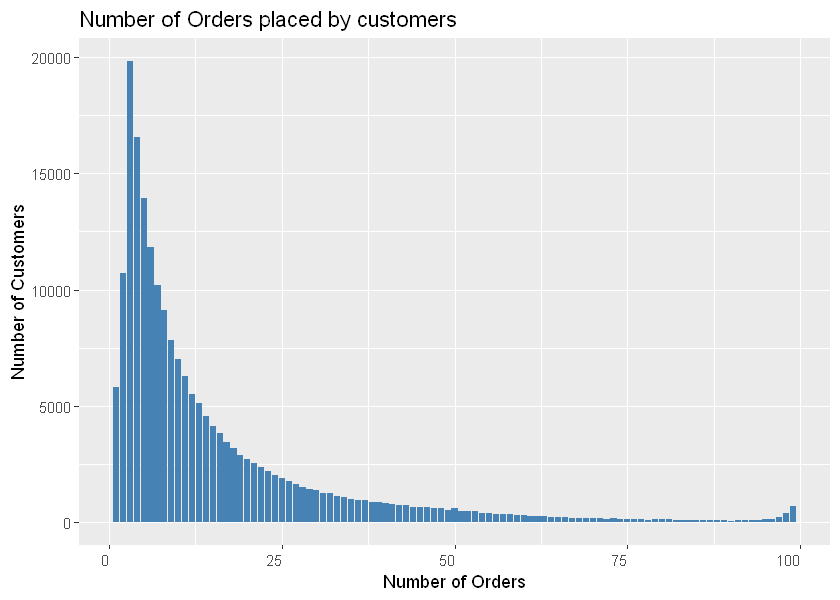

In [39]:
# How many Orders are customers placing?
order_products_large %>%
  group_by(user_id) %>%
  dplyr::summarize(max_order = max(order_number)) %>%
  group_by(max_order) %>%
  dplyr::summarize(cnt = n()) %>%
  arrange(max_order) %>%
  ggplot(aes(x = max_order, y = cnt)) +
  geom_bar(stat = "identity", fill="steelblue") +
  geom_text(aes(label=""), vjust=1.6, color="white", size=4) +
  labs( title = "Number of Orders placed by customers",
        subtitle = "Lets go bananas",
        x = "Number of Orders", 
        y = "Number of Customers") +
  labs(subtitle = NULL)+
  theme(axis.text.x = element_text(angle = 0, hjust = 1))

## <center><font color=red>3. PATH TO PURCHASE - Recommend products in the Product Detail Page (PDP)</font></center>

### STEP 1: PREPARE DATA FOR ARULES MINING USING APRIORI

In [41]:
# Step 1.1: We will use the order_product_large dataframe which is a denormalized 
#            version based on joining all the source datasets
head(order_products_large)

order_dow,order_id,product_id,aisle_id,department_id,product_name,department,aisle,add_to_cart_order,reordered,user_id,eval_set,order_number,order_hour_of_day,days_since_prior_order,order_day
0,1900953,20153,100,21,Eat Your Colors Purples Puree Baby Food,missing,missing,18,0,151991,prior,23,17,12,Sun
0,3194251,4846,38,1,Weight Watchers Three Cheese Ziti Marinara,frozen,frozen meals,7,1,52051,prior,9,9,30,Sun
0,2287684,39877,24,4,Organic Granny Smith Apple,produce,fresh fruits,8,1,20939,prior,19,8,5,Sun
0,1454788,43555,105,13,Arthur Chocolate Chip Cookie Mix,pantry,doughs gelatins bake mixes,12,1,39507,prior,6,10,7,Sun
0,1982590,5456,96,20,Green Tea With Ginseng and Honey,deli,lunch meat,14,0,144281,prior,4,12,30,Sun
0,891046,23594,51,13,Medium Salsa,pantry,preserved dips spreads,7,0,28675,prior,9,15,30,Sun


In [42]:
# Step 1.2: Key essential spec before generating the basket format dataset is to remove "commas" from the product_name
remove_bad_chars <- function (x, y) { gsub(y, "", x) }

#order_products_large$product_name <- remove_bad_chars(order_products_large$product_name, ",")

print("Do not do this step. It has been done before")

[1] "Do not do this step. It has been done before"


In [101]:
# Step 1.3: Create "basket" format

# this way is very slow, try dplyr
# transactionData <- ddply(tmp, #dataframe
#                          c("order_id"), #variables_to_be_used_to_split_data_frame
#                          function(df1)paste(tmp$product_name, collapse=",")) #function_to_be_applied

# Note: try this as this may be faster
transactionData <- select(order_products_large, order_id, product_name)  %>% 
  group_by(order_id) %>% 
  dplyr::summarize(items = paste0(product_name,collapse = ","))

# order_id, product_name will not be of any use in the rule mining, set to NULL
transactionData$order_id <- NULL

# We see that we have the same number of transactions as per the number of order_ids 
print(nrow(transactionData))
print(nrow(transactionData) == length(unique(order_products_large$order_id)))
head(transactionData)

fwrite(transactionData,"basket_transactions_full.csv", quote=FALSE, row.names=FALSE, col.names=FALSE)


[1] 1484705
[1] TRUE


items
"""Natural Sweetener"",""Organic Egg Whites"",""Carrots"",""Coconut Butter"",""All Natural No Stir Creamy Almond Butter"",""Classic Blend Cole Slaw"",""Original Unflavored Gelatine Mix"",""Garlic Powder"",""Michigan Organic Kale"""
"""Organic Ezekiel 49 Bread Cinnamon Raisin"",""Unsweetened Almondmilk"",""Lemons"",""Air Chilled Organic Boneless Skinless Chicken Breasts"",""Organic Baby Spinach"",""Organic Ginger Root"",""Total 2% with Strawberry Lowfat Greek Strained Yogurt"""
"""Plain Pre-Sliced Bagels"",""Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars"",""Kellogg's Nutri-Grain Apple Cinnamon Cereal"",""Sugarfree Energy Drink"",""Kellogg's Nutri-Grain Blueberry Cereal"",""Goldfish Cheddar Baked Snack Crackers"",""Honey/Lemon Cough Drops"",""Tiny Twists Pretzels"",""Original Orange Juice"",""Oats & Chocolate Chewy Bars"",""Energy Drink"",""Chewy 25% Low Sugar Chocolate Chip Granola"",""Traditional Snack Mix"""
"""Bag of Organic Lemons"",""Dairy Milk Fruit & Nut Chocolate Bar"",""Clementines"",""2% Reduced Fat Milk"",""Natural Artesian Water Mini & Mobile"",""Macaroni And Cheese"",""Everyday Facial Tissues"",""Artichokes"",""One Ply Choose A Size Big Roll Paper Towel Rolls"",""Original Black Box Tablewater Cracker"",""Just Crisp Parmesan"",""Boneless Skinless Chicken Breast Fillets"",""Bag of Organic Bananas"",""Organic Raspberries"",""Biscuits Orange Pim's"",""Mini Original Babybel Cheese"",""Organic Hass Avocado"",""French Lavender Hand Wash"",""Spaghetti Pasta"",""Wafer Chocolate"",""Apricot Preserves"",""Meyer Lemon"",""Sensitive Toilet Paper"",""American Slices Cheese"""
"""Dryer Sheets Geranium Scent"",""Clean Day Lavender Scent Room Freshener Spray"",""Cleanse"""
"""Pineapple Chunks"",""Orange Juice"""


In [ ]:
# Step 1.4: Read the "basket" data into an object of the transaction class, using read.transactions of the arules package

tr <- read.transactions('basket_transactions_full.csv', cols = NULL,
                        format='basket', sep=',', quote = "\"", rm.duplicates = TRUE) #sep tell how the items are separated  
# rm.duplicates = TRUE means Duplicate items should be removed from transactions

#warnings()

tr

# save the transaction Object for future use, to minimize the steps
 setwd("C:\\Users\\somsa\\Documents\\Trainings\\York_University\\1_BigDataAnalytics\\CSDA1050 Advanced Analytics Capstone Course\\Capstone Project\\PreparedDataset")
 saveRDS(tr, file = "transactionData.rds")
 tr_read <- readRDS(file="transactionData.rds")

### STEP 2: VISUALIZE ITEM FREQUENCY

Before applying Arules mining, we can visualize: 
* Absolute Frequency of Top 20 Items – Plot with Frequency of each top 20 items
* Relative Frequency of Top 20 Items – How many times the items have appeared as compared to others.


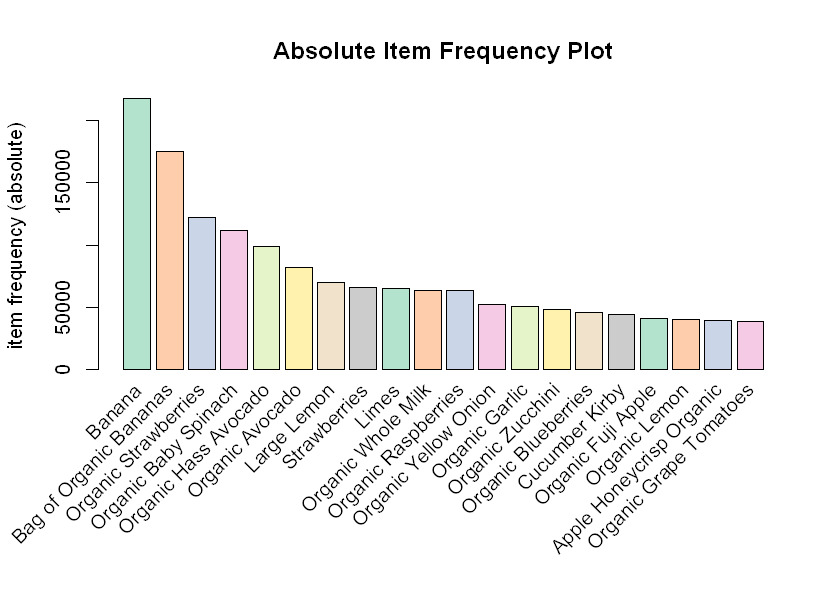

In [103]:
itemFrequencyPlot(tr,topN=20, type="absolute", col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")

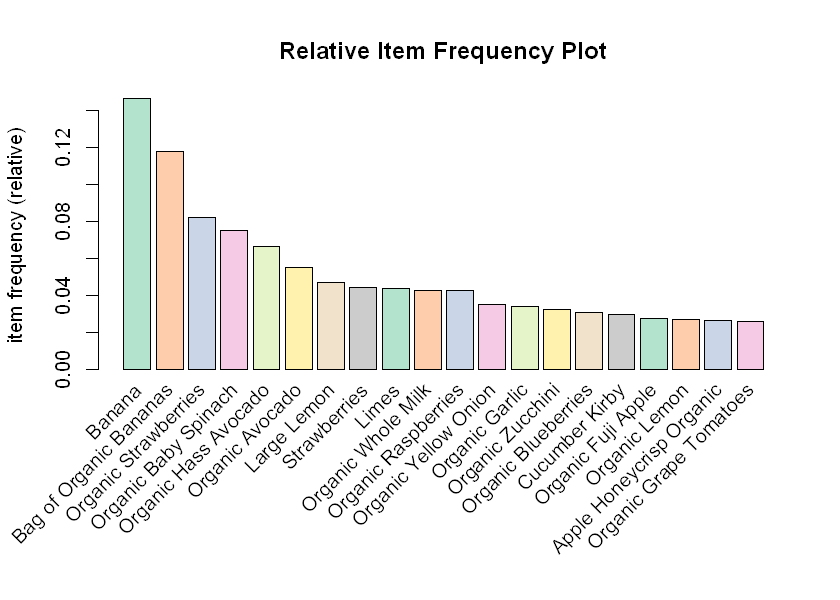

In [104]:
itemFrequencyPlot(tr,topN=20, type="relative", col=brewer.pal(8,'Pastel2'), main="Relative Item Frequency Plot")

### STEP 3: GENERATE RULES USING APRIORI

* Choosing the Support, Confidence, Maxlength (This Section Needs Further Work)
> For now, we will go with:

> Parameter  | Setting
------------- | -------------
Support:  | 0.1 %
Absolute Minimum Support Count:  | 1484 – We consider the itemset only if it exists in at least 1484 of 1484705 transactions 
Confidence:  | 30% - Association Rule X -> Y is oncluded, only if itemset Y exists in at least 30% of the transactions where itemset X exists.
Maxlength:  | Kept at default of 10


In [105]:
# 3.1 - Run Apriori
association.rules<-apriori(tr, parameter=list(support=0.001, conf=0.3, maxlen=10))
# apriori will take tr as the transaction object on which mining is to be applied.parameter will allow you to set min_sup and min_confidence.
# summary(association.rules)

# 3.2 - Remove redundant rules - Remove redundant rules which are subset of larger rules
subset.rules <- which(colSums(is.subset(association.rules, association.rules)) > 1) # get subset rules in a vector
#head(subset.rules)
#length(subset.rules) 

# Final List of rules
subset.association.rules <- association.rules[-subset.rules]
summary(subset.association.rules) # we are left with 92 unique association rules

# Write the wrules in a csv
write(subset.association.rules, file = "AssociationRules.csv", sep =",")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[52703 item(s), 1484705 transaction(s)] done [9.86s].
sorting and recoding items ... [1708 item(s)] done [0.20s].
creating transaction tree ... done [1.71s].
checking subsets of size 1 2 3 4 done [0.65s].
writing ... [173 rule(s)] done [0.00s].
creating S4 object  ... done [0.33s].


set of 110 rules

rule length distribution (lhs + rhs):sizes
 2  3 
39 71 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.645   3.000   3.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.001006   Min.   :0.3001   Min.   : 2.050   Min.   : 1493  
 1st Qu.:0.001139   1st Qu.:0.3197   1st Qu.: 2.552   1st Qu.: 1691  
 Median :0.001390   Median :0.3346   Median : 2.875   Median : 2063  
 Mean   :0.002095   Mean   :0.3464   Mean   : 8.405   Mean   : 3110  
 3rd Qu.:0.001955   3rd Qu.:0.3642   3rd Qu.: 3.736   3rd Qu.: 2902  
 Max.   :0.016662   Max.   :0.4625   Max.   :76.322   Max.   :24738  

mining info:
 data ntransactions support confidence
   tr       1484705   0.001        0.3

In [106]:
# There are 92 rules, lets print only top 10
inspect(subset.association.rules[1:10]) 

     lhs                                           rhs                                                                       support confidence      lift count
[1]  {Zero Calorie Cola}                        => {Neo To Go! No-Touch Spray First Aid Antiseptic/Pain Relieving Spray} 0.001231895  0.4624526 41.282207  1829
[2]  {Apples}                                   => {Clementines}                                                         0.001299922  0.3286225 34.198324  1930
[3]  {Lemon Sparkling Water}                    => {Grapefruit Sparkling Water}                                          0.001054755  0.3546999 76.322420  1566
[4]  {Non Fat Acai & Mixed Berries Yogurt}      => {Icelandic Style Skyr Blueberry Non-fat Yogurt}                       0.001211689  0.4529204 76.190035  1799
[5]  {Medium Navel Orange}                      => {Banana}                                                              0.001012322  0.3242019  2.211897  1503
[6]  {Mandarin Oranges}                 

In [107]:
# 3.3 - Inspect Rules
# Top 10 rules by lift
cat("Top 10 rules by lift:")
cat("\n")
cat("\n")
inspect(head(subset.association.rules, n = 10, by = "lift"))

Top 10 rules by lift:

     lhs                                                   rhs                                                                       support confidence     lift count
[1]  {Lemon Sparkling Water}                            => {Grapefruit Sparkling Water}                                          0.001054755  0.3546999 76.32242  1566
[2]  {Non Fat Acai & Mixed Berries Yogurt}              => {Icelandic Style Skyr Blueberry Non-fat Yogurt}                       0.001211689  0.4529204 76.19003  1799
[3]  {Nonfat Icelandic Style Strawberry Yogurt}         => {Non Fat Raspberry Yogurt}                                            0.001172624  0.3572015 70.80625  1741
[4]  {Nonfat Icelandic Style Strawberry Yogurt}         => {Icelandic Style Skyr Blueberry Non-fat Yogurt}                       0.001380746  0.4205991 70.75296  2050
[5]  {Nonfat Icelandic Style Strawberry Yogurt}         => {Vanilla Skyr Nonfat Yogurt}                                          0.001206974  

In [111]:
# Top 10 rules by support
cat("Top 10 rules by support:")
cat("\n")
cat("\n")
inspect(head(subset.association.rules, n = 10, by = "support"))

Top 10 rules by support:

     lhs                                       rhs                          support confidence     lift count
[1]  {Organic Avocado}                      => {Banana}                 0.016661896  0.3019591 2.060144 24738
[2]  {Organic Fuji Apple}                   => {Banana}                 0.010550244  0.3782296 2.580506 15664
[3]  {Cucumber Kirby}                       => {Banana}                 0.009818112  0.3284144 2.240637 14577
[4]  {Honeycrisp Apple}                     => {Banana}                 0.008739110  0.3540439 2.415497 12975
[5]  {Organic Large Extra Fancy Fuji Apple} => {Bag of Organic Bananas} 0.007321320  0.3112116 2.633571 10870
[6]  {Organic Hass Avocado,                                                                                  
      Organic Strawberries}                 => {Bag of Organic Bananas} 0.004667594  0.3679711 3.113888  6930
[7]  {Organic D'Anjou Pears}                => {Bag of Organic Bananas} 0.004550399  0.3015264

In [114]:
# Top 10 rules by confidence
cat("Top 10 rules by confidence:")
cat("\n")
cat("\n")
inspect(head(subset.association.rules, n = 10, by = "confidence"))

Top 10 rules by confidence:

     lhs                                           rhs                                                                       support confidence      lift count
[1]  {Zero Calorie Cola}                        => {Neo To Go! No-Touch Spray First Aid Antiseptic/Pain Relieving Spray} 0.001231895  0.4624526 41.282207  1829
[2]  {Non Fat Acai & Mixed Berries Yogurt}      => {Icelandic Style Skyr Blueberry Non-fat Yogurt}                       0.001211689  0.4529204 76.190035  1799
[3]  {Organic Yellow Squash}                    => {Organic Zucchini}                                                    0.001549803  0.4473173 13.641454  2301
[4]  {Organic Hass Avocado,                                                                                                                                    
      Organic Kiwi}                             => {Bag of Organic Bananas}                                              0.001289145  0.4386890  3.712325  1914
[5]  {Organ

Itemsets in Antecedent (LHS)
 [1] "{Mango Chunks}"                                    
 [2] "{Total 2% Lowfat Greek Strained Yogurt with Peach}"
 [3] "{Non Fat Raspberry Yogurt}"                        
 [4] "{Peach Pear Flavored Sparkling Water}"             
 [5] "{Asparation/Broccolini/Baby Broccoli}"             
 [6] "{Zero Calorie Cola}"                               
 [7] "{Large Yellow Flesh Nectarine}"                    
 [8] "{Gala Apples}"                                     
 [9] "{Apples}"                                          
[10] "{Organic Nectarine}"                               
[11] "{Berry Medley}"                                    
[12] "{Organic Yellow Squash}"                           
[13] "{Sparkling Water Berry}"                           
[14] "{Frozen Broccoli Florets}"                         
[15] "{Mandarin Oranges}"                                
[16] "{Non Fat Acai & Mixed Berries Yogurt}"             
[17] "{Nonfat Icelandic Style Strawberry Yo

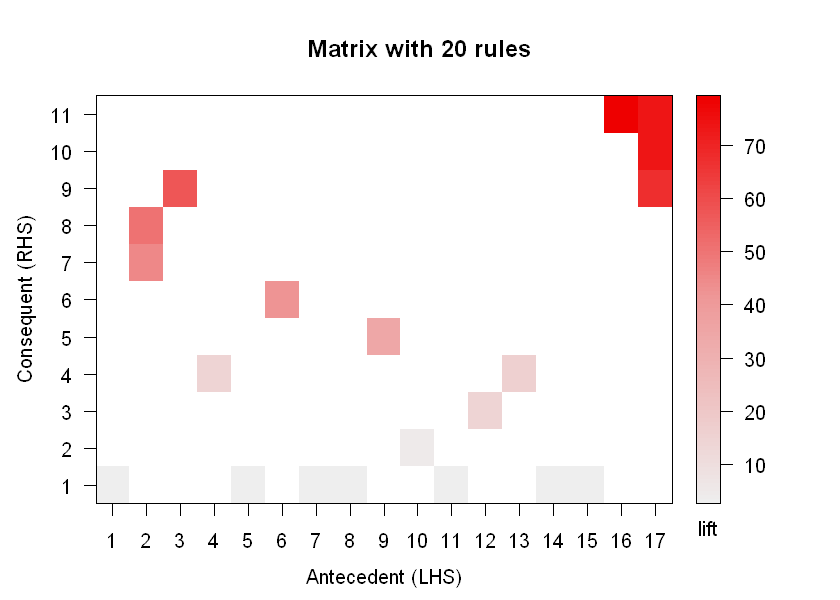

In [82]:
plot(subset.association.rules[1:20],
     method = "matrix",
     control = list(reorder = 'similarity'))

### STEP 4: Finding Rules  related to a given item - This is when we want to work on a specific product

In [83]:
# A. To find what customers buy before buying 'Apples':
#     Here rhs=Coconut Milk because you want to find out the probability of that in how many customers buy Apples along with other items
apples.association.rules1 <- apriori(tr, parameter=list(supp=0.001, conf=0.2), appearance = list(default="lhs", rhs="Apples")) 
inspect(apples.association.rules1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[163536 item(s), 1484705 transaction(s)] done [10.75s].
sorting and recoding items ... [1616 item(s)] done [0.22s].
creating transaction tree ... done [1.55s].
checking subsets of size 1 2 3 4 done [0.54s].
writing ... [0 rule(s)] done [0.01s].
creating S4 object  ... done [0.31s].


In [84]:
# B. To answer the question Customers who bought Apples also bought....:
#     Here lhs=Apples
apples.association.rules2 <- apriori(tr, parameter=list(supp=0.001, conf=0.25), appearance = list(lhs="Apples", default="rhs")) 
inspect(apples.association.rules2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[163536 item(s), 1484705 transaction(s)] done [11.89s].
sorting and recoding items ... [1616 item(s)] done [0.22s].
creating transaction tree ... done [1.53s].
checking subsets of size 1 2 done [0.06s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.34s].
    lhs         rhs           support     confidence lift    count
[1] {Apples} => {Clementines} 0.001213709 0.3163068  33.9249 1802 


### STEP 5: RECOMMEND PRODUCTS IN PDP
* As part of this step, we are able to recommend products in the PDP page. We are able to show remommended items, more like Customers who bought Product A, also bought Product B.

In [86]:
# This Function will run the apriori algorithm and give a result of all suggested items in the PDP page
recommend_similar_products_v2 <- function(customer_bought) {
  #arules::subset(subset.association.rules, subset = lhs %in% customer_bought)
  df <- as(apriori(tr, parameter=list(supp=0.001, conf=0.2), appearance = list(lhs = customer_bought, default="rhs")) , "data.frame")
  df$lhs <- str_split_fixed(df$rules, ' => ', 2)[,1]
  df$rhs <- str_split_fixed(df$rules, ' => ', 2)[,2]
  
  df$lhs  <- gsub('[{}]', '', df$lhs)
  df$rhs  <- gsub('[{}]', '', df$rhs)
  print (paste("Customers who bought [**", customer_bought, "**], Also Bought: " ))
  print(paste("[--", df$rhs, "--]"))
  return(unique(df$rhs))
}

In [87]:
recommend_similar_products_v2("Broccoli Crown")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[163536 item(s), 1484705 transaction(s)] done [11.49s].
sorting and recoding items ... [1616 item(s)] done [0.20s].
creating transaction tree ... done [1.70s].
checking subsets of size 1 2 done [0.15s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.32s].
[1] "Customers who bought [** Broccoli Crown **], Also Bought: "
[1] "[-- Banana --]"


[1] "Banana"

In [115]:
recommend_similar_products_v2("Apples")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[52703 item(s), 1484705 transaction(s)] done [9.61s].
sorting and recoding items ... [1708 item(s)] done [0.20s].
creating transaction tree ... done [1.58s].
checking subsets of size 1 2 done [0.05s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.32s].
[1] "Customers who bought [** Apples **], Also Bought: "
[1] "[-- Clementines --]"


[1] "Clementines"

In [89]:
recommend_similar_products_v2("Organic Yellow Squash")



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[163536 item(s), 1484705 transaction(s)] done [10.94s].
sorting and recoding items ... [1616 item(s)] done [0.22s].
creating transaction tree ... done [1.63s].
checking subsets of size 1 2 done [0.10s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.31s].
[1] "Customers who bought [** Organic Yellow Squash **], Also Bought: "
[1] "[-- Organic Zucchini --]"


[1] "Organic Zucchini"

In [91]:
recommend_similar_products_v2("Nonfat Icelandic Style Strawberry Yogurt")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1484 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[163536 item(s), 1484705 transaction(s)] done [10.71s].
sorting and recoding items ... [1616 item(s)] done [0.25s].
creating transaction tree ... done [1.91s].
checking subsets of size 1 2 done [0.14s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.37s].
[1] "Customers who bought [** Nonfat Icelandic Style Strawberry Yogurt **], Also Bought: "
[1] "[-- Non Fat Raspberry Yogurt --]"                     
[2] "[-- Vanilla Skyr Nonfat Yogurt --]"                   
[3] "[-- Icelandic Style Skyr Blueberry Non-fat Yogurt --]"


[1] "Non Fat Raspberry Yogurt"                     
[2] "Vanilla Skyr Nonfat Yogurt"                   
[3] "Icelandic Style Skyr Blueberry Non-fat Yogurt"